In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [4]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [5]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [7]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [8]:
file_path = 'cae_inv_n_norm/less_10/'

## Similaridades menores ou iguais a 10 são defindas como zero.

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original


### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida Não Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida quanto maior for o valor maior é a similaridade entre os itens.

#### Ajuste de sparsidade
Como medida experimental as similaridades que obtiveram valores menores ou iguais a 10 (Dez) foram consideradas com similaridade nula, ou seja, seu valor foi modificado para 0 (zero).

* Obs: O maior valor encontrado na matriz de similaridade corresponde a similaridade do vetor com ele mesmo.

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.

### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "CAE" é possível verificar que mesmo alterando o tipo da rede neural (vgg's, resnet ou xception) eles apresentam um comportamento bastante similar.

Para a métrica "Recall" quanto maior o valor de @k melhor o resultado.

Para métrica NDCG, os valores de @k entre 10 e 50 tem resultados similares, no entanto, para um @k de 100 o desempenho do algoritmo aumenta consideravelmente.

Na métrica de avaliação MAP o algoritmo tem um comportamento contrário ao Recall, quanto maior o valor de @k pior foi seu desempenho.


#### Tornar o DataSet mais esparso não foi suficiente para modificar significativamente os resultados.

* Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as representações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

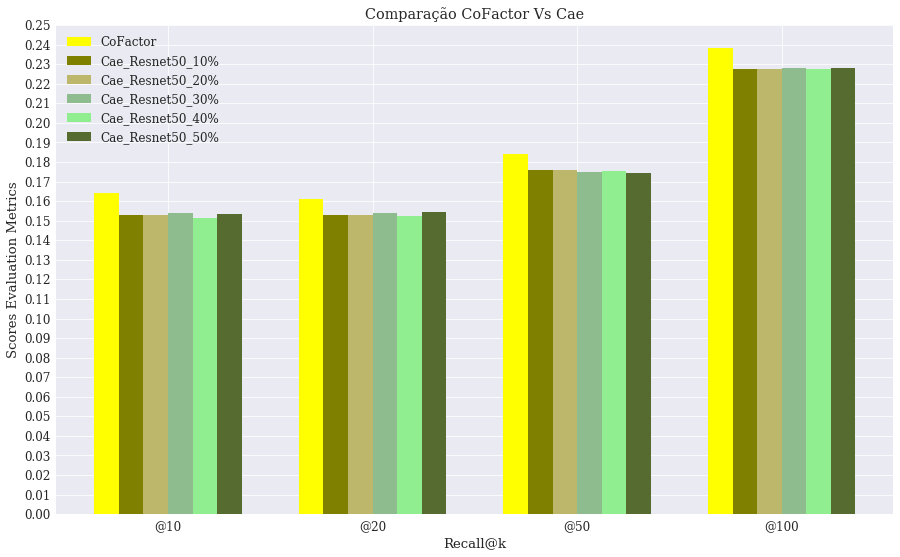

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1529  0.1527  0.1757  0.2273
20%       0.1529  0.1527  0.1757  0.2273
30%       0.1538  0.1537  0.1751  0.2280
40%       0.1512  0.1525  0.1752  0.2274
50%       0.1532  0.1544  0.1742  0.2279





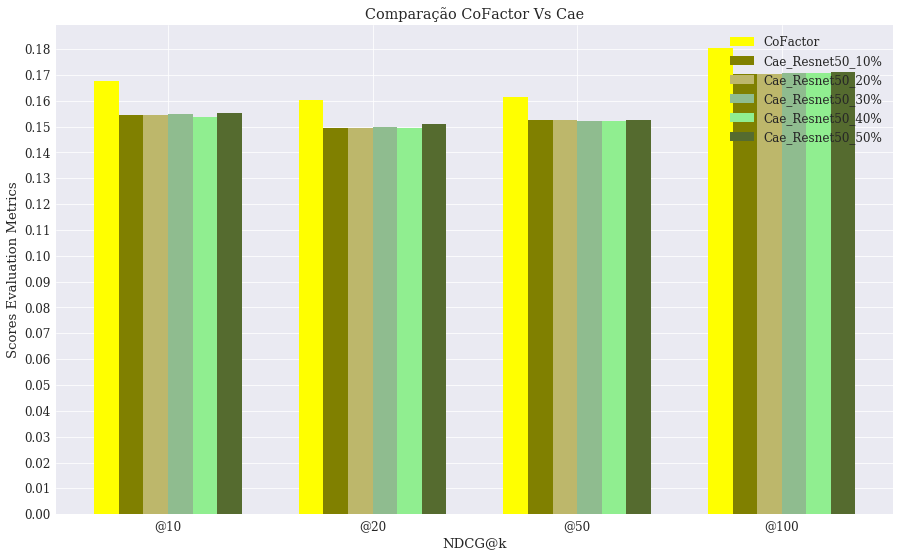

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1544  0.1495  0.1525  0.1705
20%       0.1544  0.1495  0.1525  0.1705
30%       0.1547  0.1498  0.1522  0.1706
40%       0.1536  0.1495  0.1522  0.1706
50%       0.1553  0.1509  0.1524  0.1712





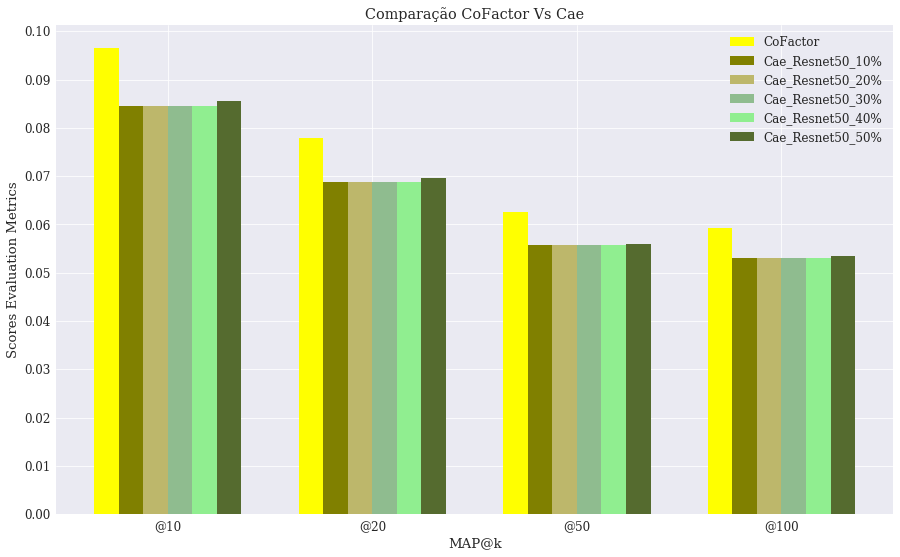

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0845  0.0687  0.0557  0.0530
20%       0.0845  0.0687  0.0557  0.0530
30%       0.0846  0.0688  0.0557  0.0530
40%       0.0846  0.0687  0.0558  0.0531
50%       0.0856  0.0696  0.0560  0.0534


In [9]:
list_file_name = ['cae_resnet50_10_pct_rec_val'
                  , 'cae_resnet50_20_pct_rec_val'
                  , 'cae_resnet50_30_pct_rec_val'
                  , 'cae_resnet50_40_pct_rec_val'
                  , 'cae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

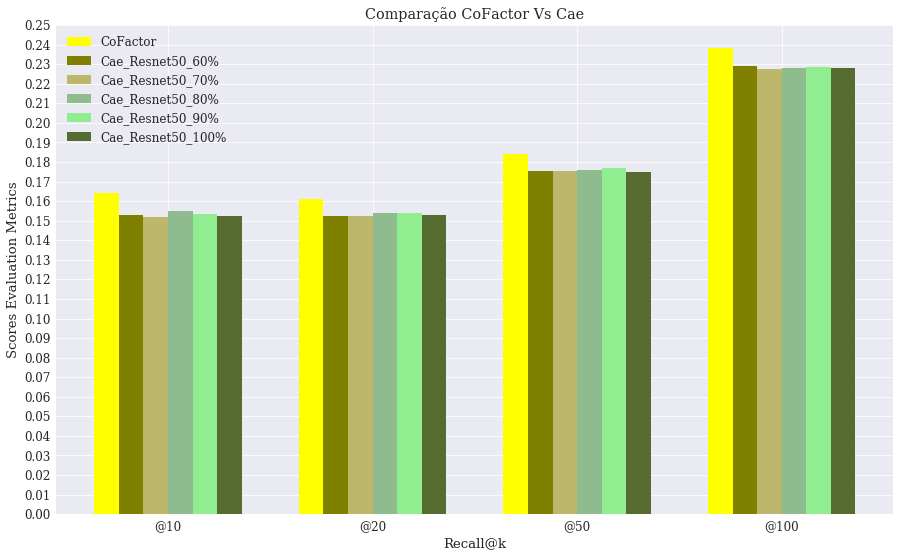

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1530  0.1526  0.1752  0.2289
70%       0.1520  0.1524  0.1756  0.2277
80%       0.1547  0.1540  0.1759  0.2282
90%       0.1536  0.1537  0.1770  0.2287
100%      0.1522  0.1531  0.1751  0.2280





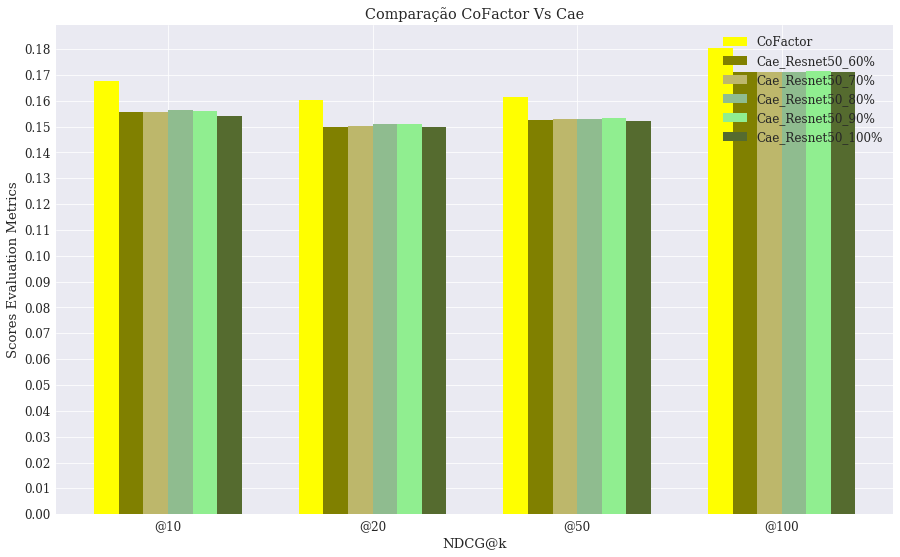

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1555  0.1500  0.1527  0.1713
70%       0.1555  0.1501  0.1528  0.1710
80%       0.1565  0.1510  0.1529  0.1712
90%       0.1560  0.1508  0.1532  0.1714
100%      0.1539  0.1500  0.1523  0.1710





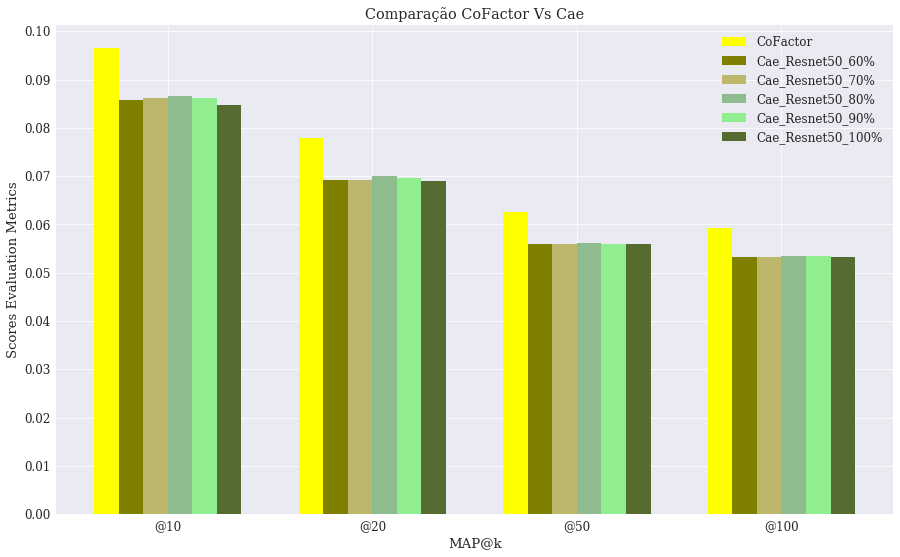

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0858  0.0692  0.0559  0.0533
70%       0.0861  0.0692  0.0560  0.0533
80%       0.0867  0.0700  0.0562  0.0534
90%       0.0862  0.0696  0.0560  0.0534
100%      0.0848  0.0690  0.0559  0.0533


In [10]:
list_file_name = ['cae_resnet50_60_pct_rec_val'
                  , 'cae_resnet50_70_pct_rec_val'
                  , 'cae_resnet50_80_pct_rec_val'
                  , 'cae_resnet50_90_pct_rec_val'
                  , 'cae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

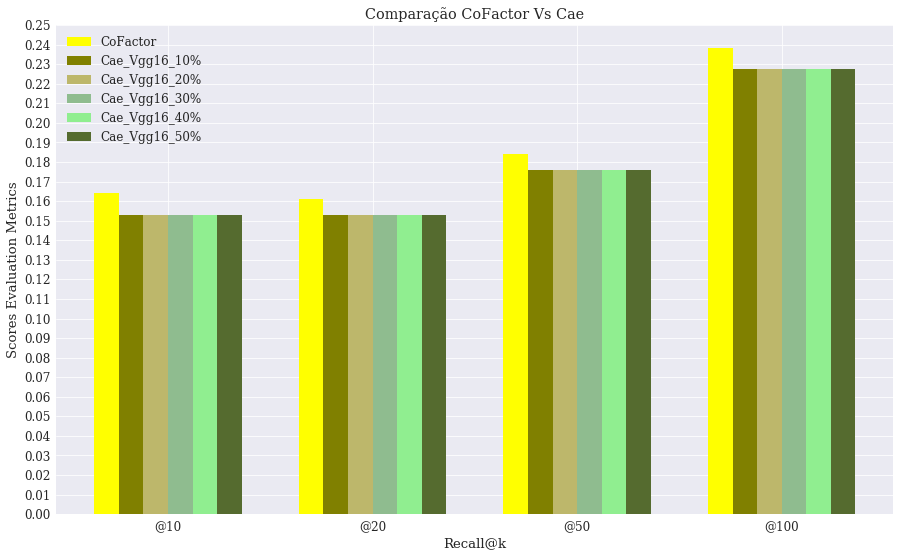

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1529  0.1527  0.1757  0.2273
20%       0.1529  0.1527  0.1757  0.2273
30%       0.1529  0.1527  0.1757  0.2273
40%       0.1529  0.1527  0.1757  0.2273
50%       0.1529  0.1527  0.1757  0.2273





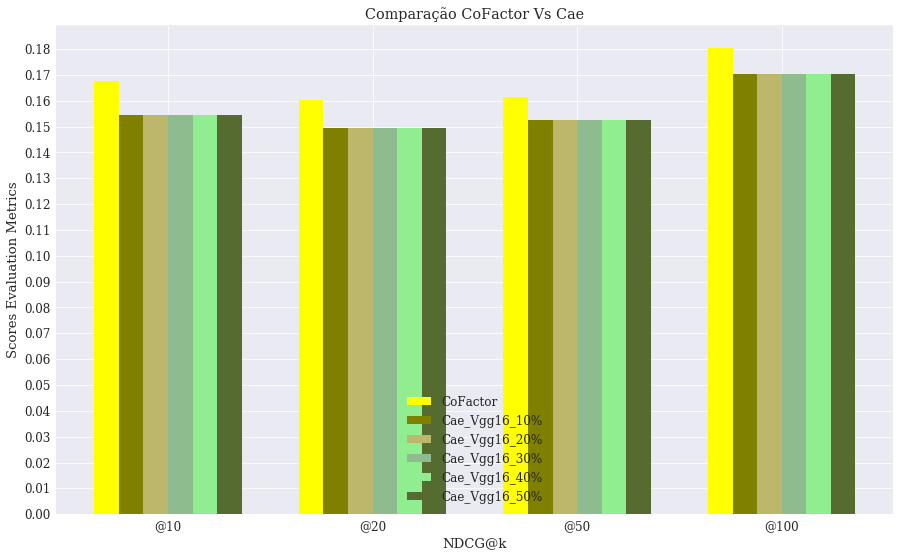

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1544  0.1495  0.1525  0.1705
20%       0.1544  0.1495  0.1525  0.1705
30%       0.1544  0.1495  0.1525  0.1705
40%       0.1544  0.1495  0.1525  0.1705
50%       0.1544  0.1495  0.1525  0.1705





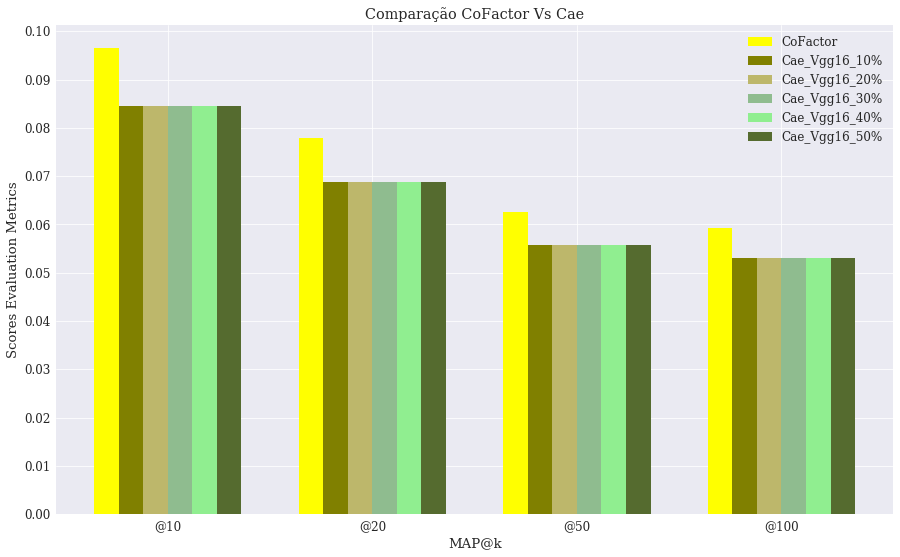

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0845  0.0687  0.0557  0.0530
20%       0.0845  0.0687  0.0557  0.0530
30%       0.0845  0.0687  0.0557  0.0530
40%       0.0845  0.0687  0.0557  0.0530
50%       0.0845  0.0687  0.0557  0.0530


In [11]:
list_file_name = ['cae_vgg16_10_pct_rec_val'
                  , 'cae_vgg16_20_pct_rec_val'
                  , 'cae_vgg16_30_pct_rec_val'
                  , 'cae_vgg16_40_pct_rec_val'
                  , 'cae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

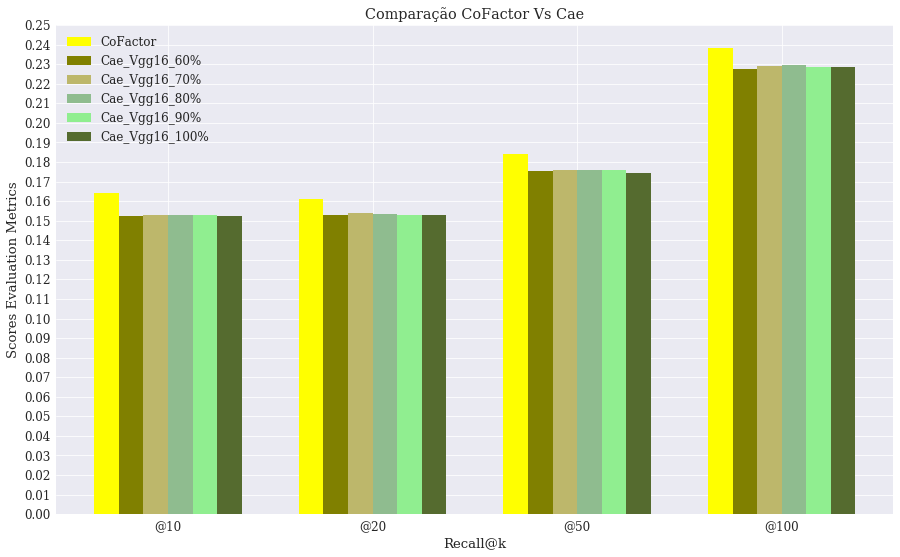

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1526  0.1529  0.1752  0.2274
70%       0.1527  0.1539  0.1759  0.2289
80%       0.1530  0.1535  0.1757  0.2294
90%       0.1530  0.1528  0.1757  0.2283
100%      0.1525  0.1528  0.1746  0.2286





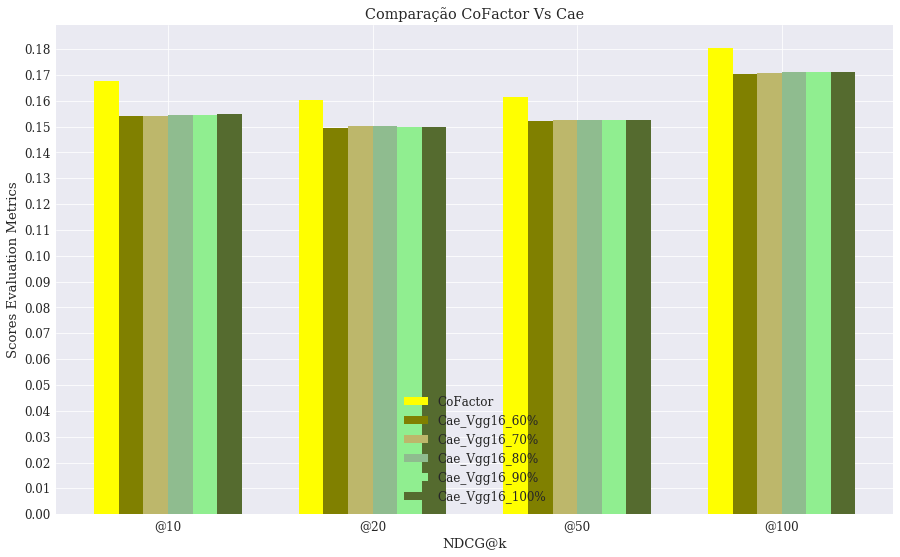

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1541  0.1496  0.1522  0.1705
70%       0.1542  0.1501  0.1524  0.1709
80%       0.1546  0.1501  0.1527  0.1713
90%       0.1545  0.1498  0.1527  0.1710
100%      0.1547  0.1499  0.1524  0.1711





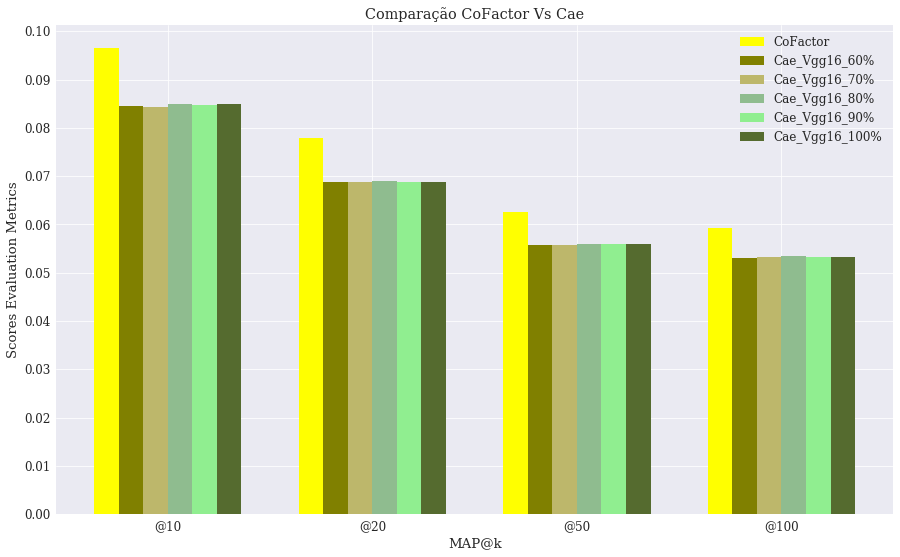

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0845  0.0689  0.0557  0.0530
70%       0.0844  0.0689  0.0557  0.0532
80%       0.0850  0.0690  0.0560  0.0534
90%       0.0848  0.0689  0.0560  0.0533
100%      0.0850  0.0689  0.0559  0.0532


In [12]:
list_file_name = ['cae_vgg16_60_pct_rec_val'
                  , 'cae_vgg16_70_pct_rec_val'
                  , 'cae_vgg16_80_pct_rec_val'
                  , 'cae_vgg16_90_pct_rec_val'
                  ,'cae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

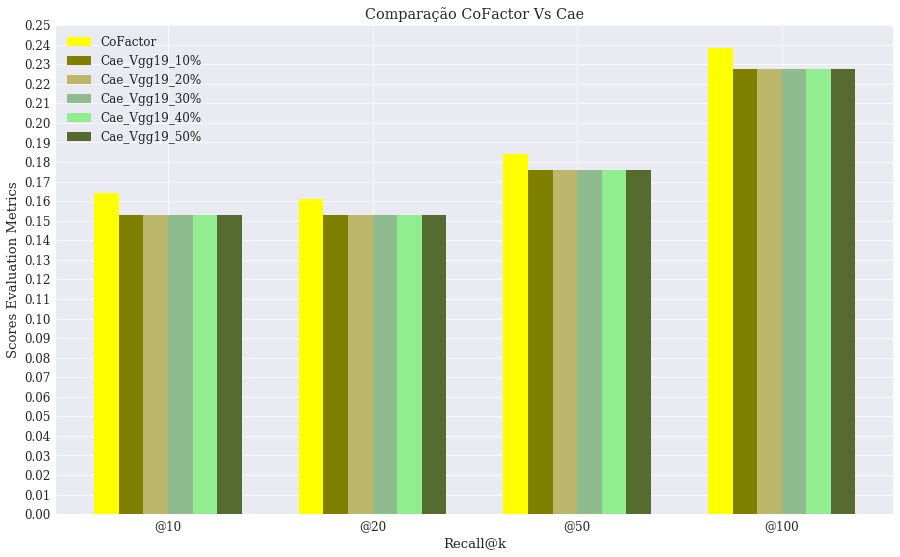

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1529  0.1527  0.1757  0.2273
20%       0.1529  0.1527  0.1757  0.2273
30%       0.1529  0.1527  0.1757  0.2273
40%       0.1529  0.1527  0.1757  0.2273
50%       0.1529  0.1527  0.1757  0.2273





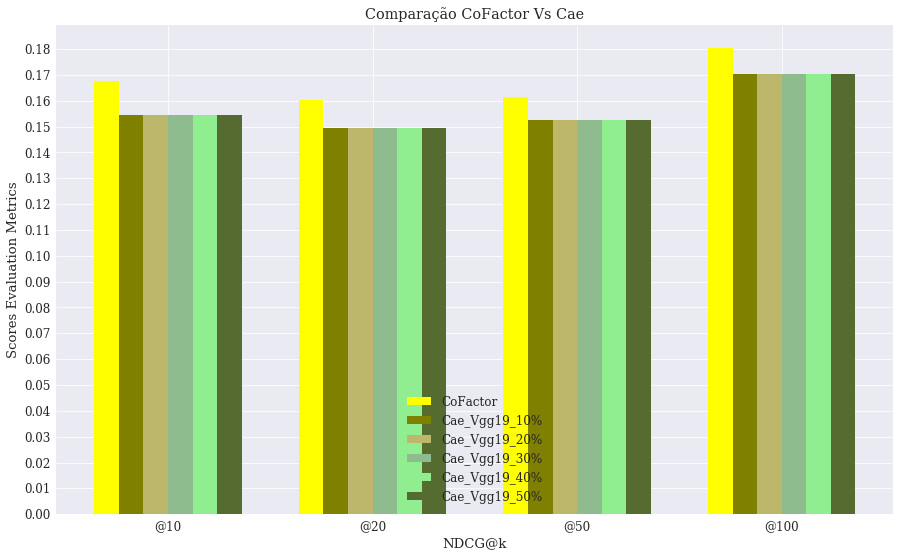

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1544  0.1495  0.1525  0.1705
20%       0.1544  0.1495  0.1525  0.1705
30%       0.1544  0.1495  0.1525  0.1705
40%       0.1544  0.1495  0.1525  0.1705
50%       0.1544  0.1495  0.1525  0.1705





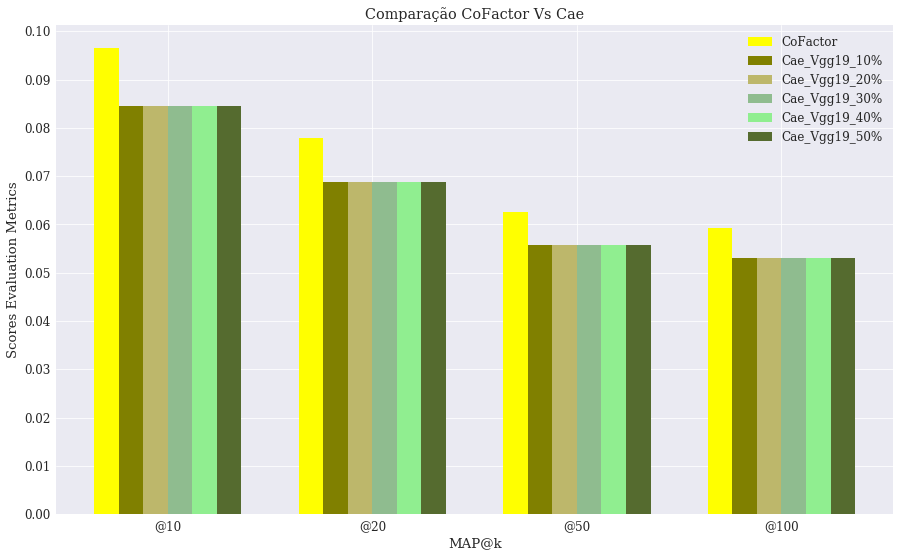

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0845  0.0687  0.0557  0.0530
20%       0.0845  0.0687  0.0557  0.0530
30%       0.0845  0.0687  0.0557  0.0530
40%       0.0845  0.0687  0.0557  0.0530
50%       0.0845  0.0687  0.0557  0.0530


In [13]:
list_file_name = ['cae_vgg19_10_pct_rec_val'
                  , 'cae_vgg19_20_pct_rec_val'
                  , 'cae_vgg19_30_pct_rec_val'
                  , 'cae_vgg19_40_pct_rec_val'
                  , 'cae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

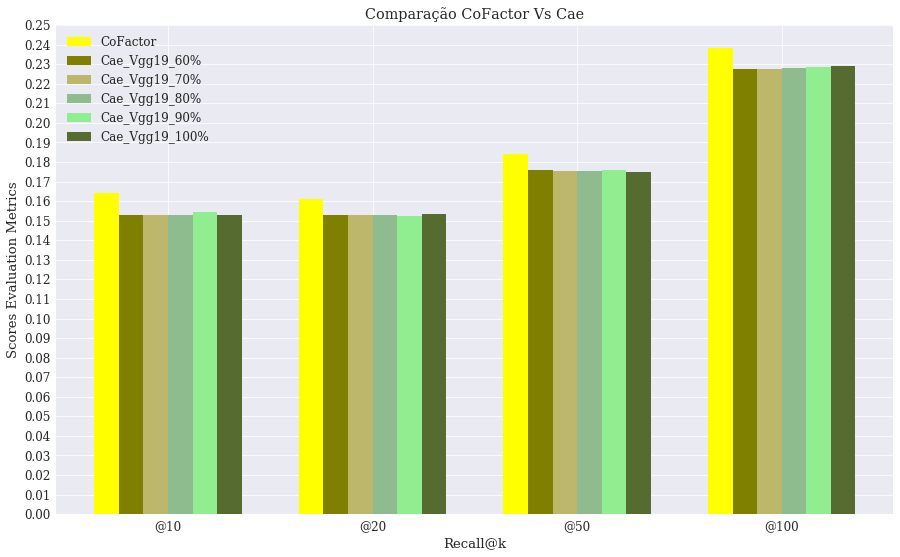

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1529  0.1527  0.1757  0.2273
70%       0.1531  0.1527  0.1756  0.2275
80%       0.1529  0.1528  0.1754  0.2281
90%       0.1542  0.1525  0.1757  0.2285
100%      0.1528  0.1532  0.1751  0.2288





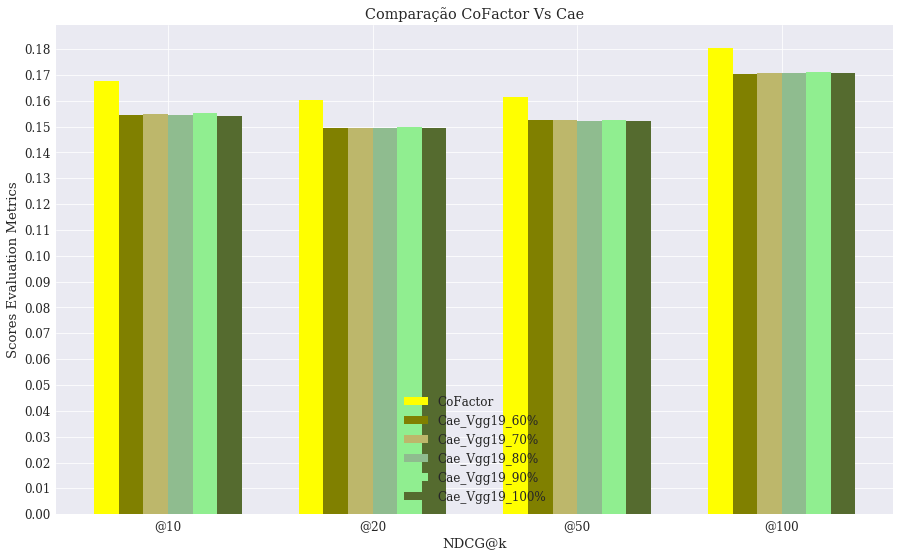

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1545  0.1495  0.1525  0.1705
70%       0.1547  0.1496  0.1525  0.1707
80%       0.1546  0.1494  0.1523  0.1707
90%       0.1554  0.1498  0.1526  0.1712
100%      0.1539  0.1495  0.1522  0.1708





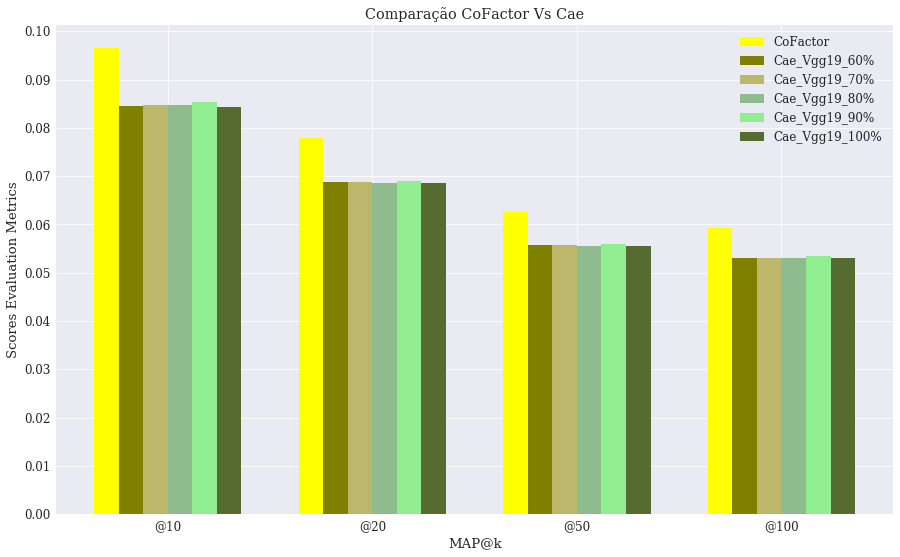

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0845  0.0687  0.0557  0.0530
70%       0.0848  0.0688  0.0558  0.0531
80%       0.0848  0.0686  0.0556  0.0530
90%       0.0854  0.0690  0.0559  0.0534
100%      0.0843  0.0686  0.0556  0.0530


In [14]:
list_file_name = ['cae_vgg19_60_pct_rec_val'
                  , 'cae_vgg19_70_pct_rec_val'
                  , 'cae_vgg19_80_pct_rec_val'
                  , 'cae_vgg19_90_pct_rec_val'
                  , 'cae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

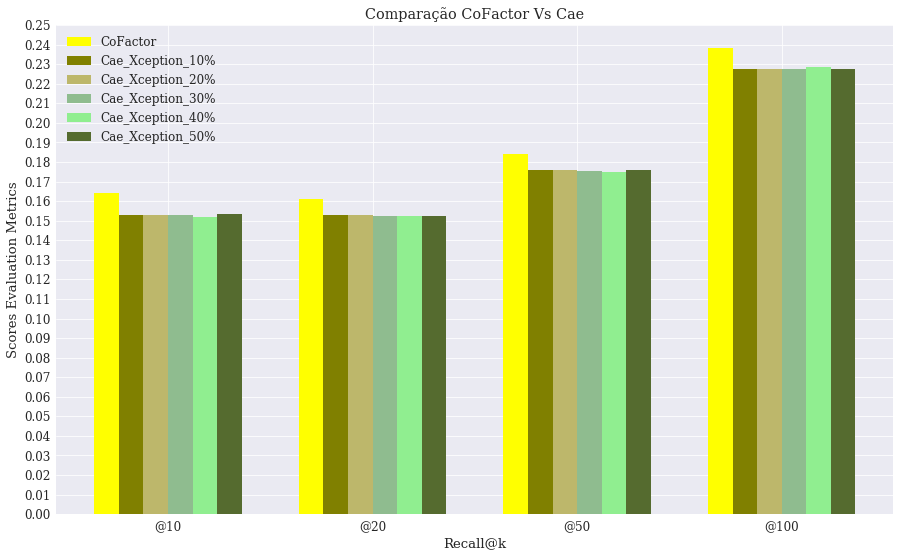

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1529  0.1527  0.1757  0.2273
20%       0.1529  0.1527  0.1757  0.2273
30%       0.1531  0.1526  0.1755  0.2276
40%       0.1519  0.1525  0.1748  0.2286
50%       0.1534  0.1525  0.1761  0.2276





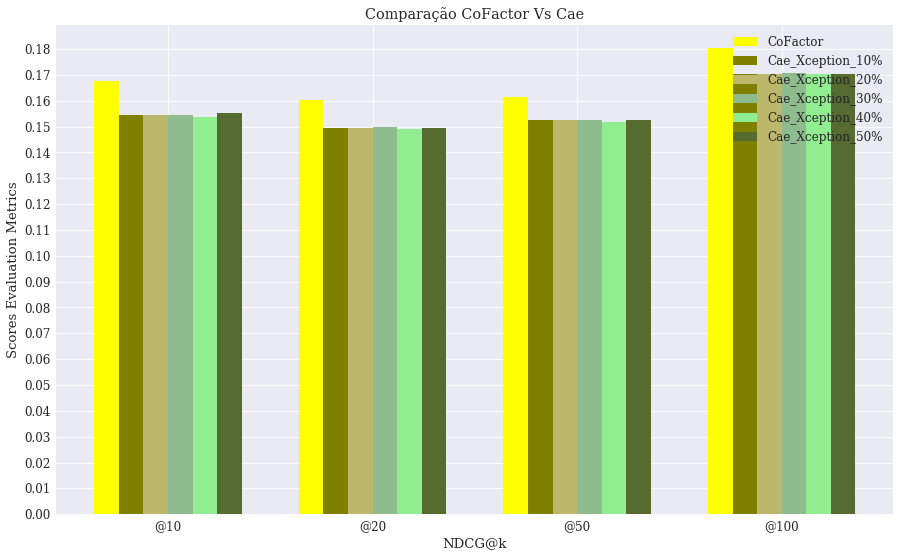

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1544  0.1495  0.1525  0.1705
20%       0.1544  0.1495  0.1525  0.1705
30%       0.1545  0.1497  0.1525  0.1707
40%       0.1538  0.1491  0.1517  0.1705
50%       0.1551  0.1495  0.1525  0.1705





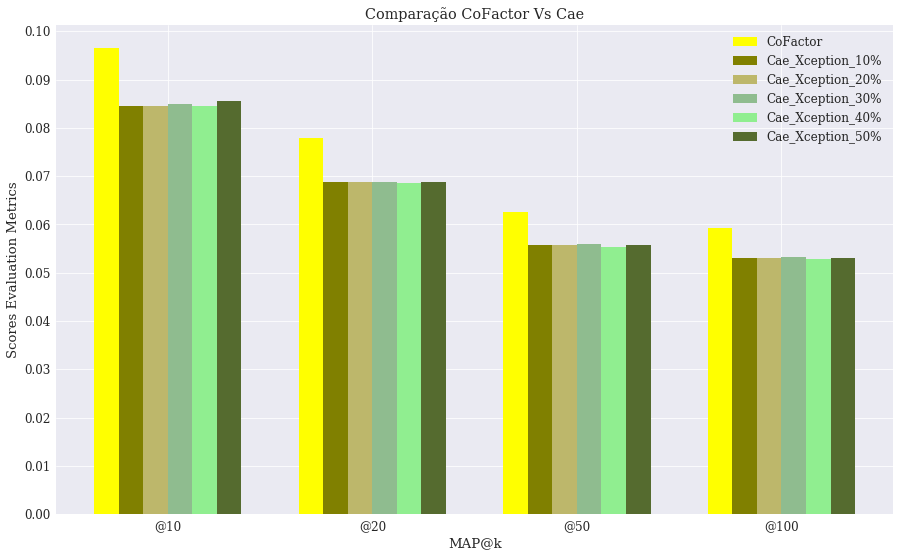

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0845  0.0687  0.0557  0.0530
20%       0.0845  0.0687  0.0557  0.0530
30%       0.0850  0.0689  0.0559  0.0532
40%       0.0846  0.0685  0.0553  0.0528
50%       0.0855  0.0689  0.0557  0.0530


In [15]:
list_file_name = ['cae_xception_10_pct_rec_val'
                  , 'cae_xception_20_pct_rec_val'
                  , 'cae_xception_30_pct_rec_val'
                  , 'cae_xception_40_pct_rec_val'
                  , 'cae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

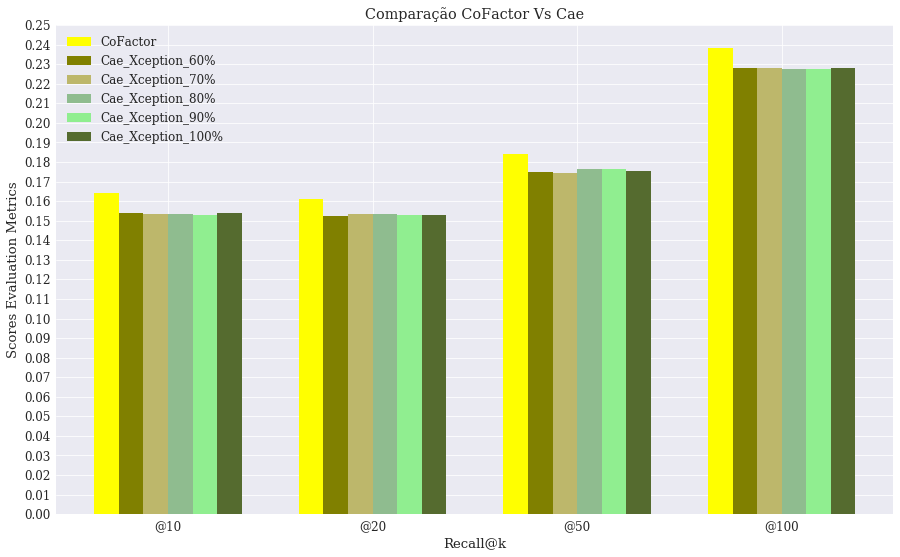

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1538  0.1523  0.1749  0.2279
70%       0.1532  0.1533  0.1744  0.2282
80%       0.1536  0.1533  0.1764  0.2277
90%       0.1529  0.1530  0.1762  0.2276
100%      0.1540  0.1530  0.1755  0.2280





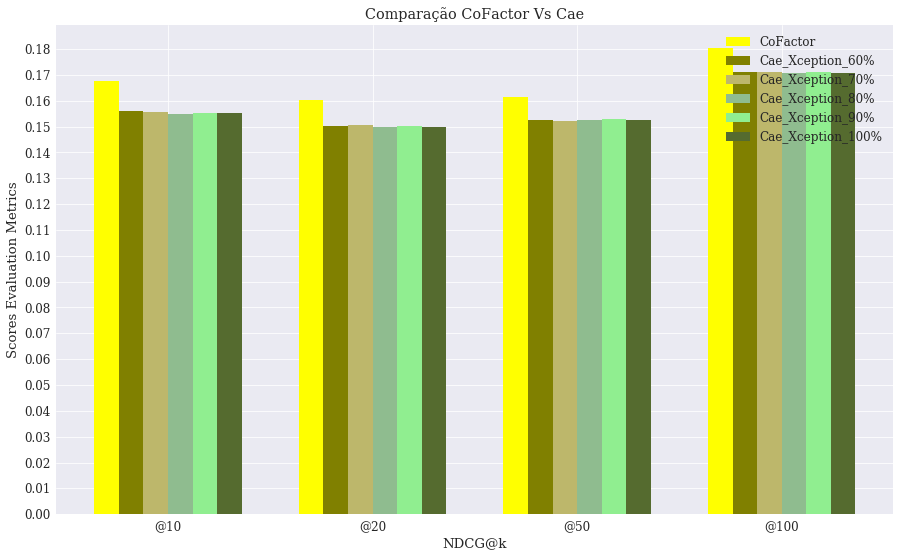

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1559  0.1502  0.1527  0.1713
70%       0.1557  0.1506  0.1523  0.1712
80%       0.1547  0.1498  0.1524  0.1706
90%       0.1552  0.1502  0.1529  0.1710
100%      0.1553  0.1499  0.1525  0.1709





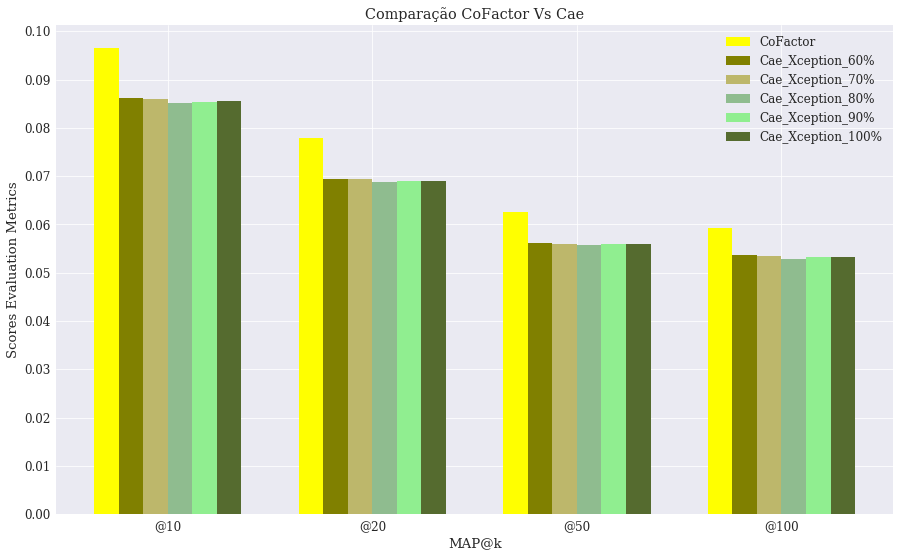

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0861  0.0694  0.0561  0.0536
70%       0.0859  0.0695  0.0560  0.0535
80%       0.0851  0.0689  0.0557  0.0529
90%       0.0854  0.0690  0.0560  0.0532
100%      0.0855  0.0691  0.0559  0.0533


In [16]:
list_file_name = ['cae_xception_60_pct_rec_val'
                  , 'cae_xception_70_pct_rec_val'
                  , 'cae_xception_80_pct_rec_val'
                  , 'cae_xception_90_pct_rec_val'
                  , 'cae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
